**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [16]:
# insert code here
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensures that the one-hot encoded DataFrames for the training and testing sets have the same column
# One-hot encode categorical features with column alignment
X_train_heart = pd.get_dummies(X_train_heart)
X_test_heart = pd.get_dummies(X_test_heart)

# Align columns to ensure consistency between training and testing sets
X_train_heart, X_test_heart = X_train_heart.align(X_test_heart, join='outer', axis=1, fill_value=0)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [17]:
# insert code here
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

heart_disease = pd.concat([X,y], join='outer', axis=1)
heart_disease.isnull().sum()

numerical_features = heart_disease.select_dtypes(include=['float64']).columns
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [18]:
# insert code here
 #!pip install xgboost

# Import XGBClassifier from xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Import accuracy_score for evaluation
from sklearn.metrics import accuracy_score

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Encode the target variable using Label Encoding
label_encoder_xgb = LabelEncoder()
y_train_heart_encoded = label_encoder_xgb.fit_transform(y_train_heart)
y_test_heart_encoded = label_encoder_xgb.transform(y_test_heart)

# Train the model
xgb_model.fit(X_train_heart, y_train_heart_encoded.ravel())

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test_heart)

# Decode the predictions back to original labels if needed
xgb_predictions_original_labels = label_encoder_xgb.inverse_transform(xgb_predictions)

# Evaluate the accuracy of the model
xgb_accuracy = accuracy_score(y_test_heart, xgb_predictions_original_labels)
print(f'Test accuracy {xgb_accuracy}')

Test accuracy 0.47540983606557374


c:\Users\agnes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\agnes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# Task 4: Hyperparameter Tuning

1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [19]:
xgb_hand=XGBClassifier(eta=0.01, max_depth=10, n_estimators=3, min_child_weight=1, subsample=0.8, colsample_bytree=1)
xgb_hand.fit(X_train_heart, y_train_heart_encoded.ravel())

# Make predictions on the test set
xgb_predictions_hand = xgb_hand.predict(X_test_heart)

# Decode the predictions back to original labels if needed
xgb_predictions_original_labels_hand = label_encoder_xgb.inverse_transform(xgb_predictions_hand)

# Evaluate the accuracy of the model
xgb_accuracy_hand = accuracy_score(y_test_heart, xgb_predictions_original_labels_hand)
print(f'Test accuracy {xgb_accuracy_hand}')



Test accuracy 0.4918032786885246


In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from xgboost import XGBClassifier
import numpy as np

# Let's assume that we have some data for a binary classification
# problem : X (n_samples, n_features) and y (n_samples,)...

cv = GridSearchCV(estimator=XGBClassifier(), 
                  param_grid={'max_depth': [3, 6, 9], 
                              'learning_rate': [0.001, 0.01, 0.05]}, 
                  cv=2)
cv.fit(X_train_heart, y_train_heart_encoded.ravel())

# Make predictions on the test set
xgb_predictions_cv = cv.predict(X_test_heart)

# Decode the predictions back to original labels if needed
xgb_predictions_original_labels_cv = label_encoder_xgb.inverse_transform(xgb_predictions_cv)

# Evaluate the accuracy of the model
xgb_accuracy_cv = accuracy_score(y_test_heart, xgb_predictions_original_labels_cv)
print(f'Test accuracy {xgb_accuracy_cv}')


Test accuracy 0.5245901639344263


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

<Axes: >

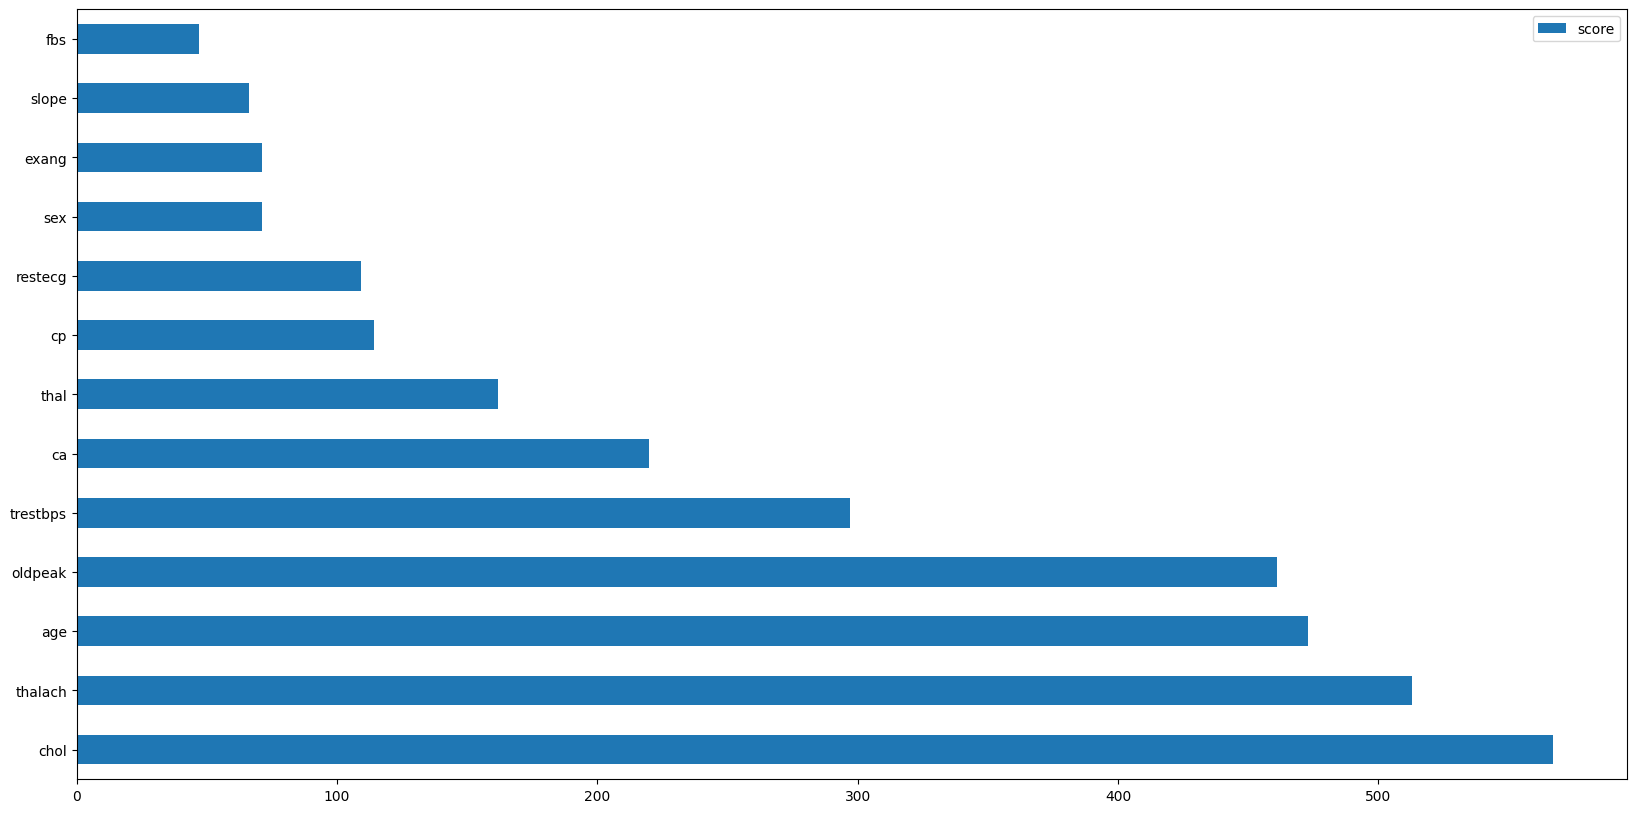

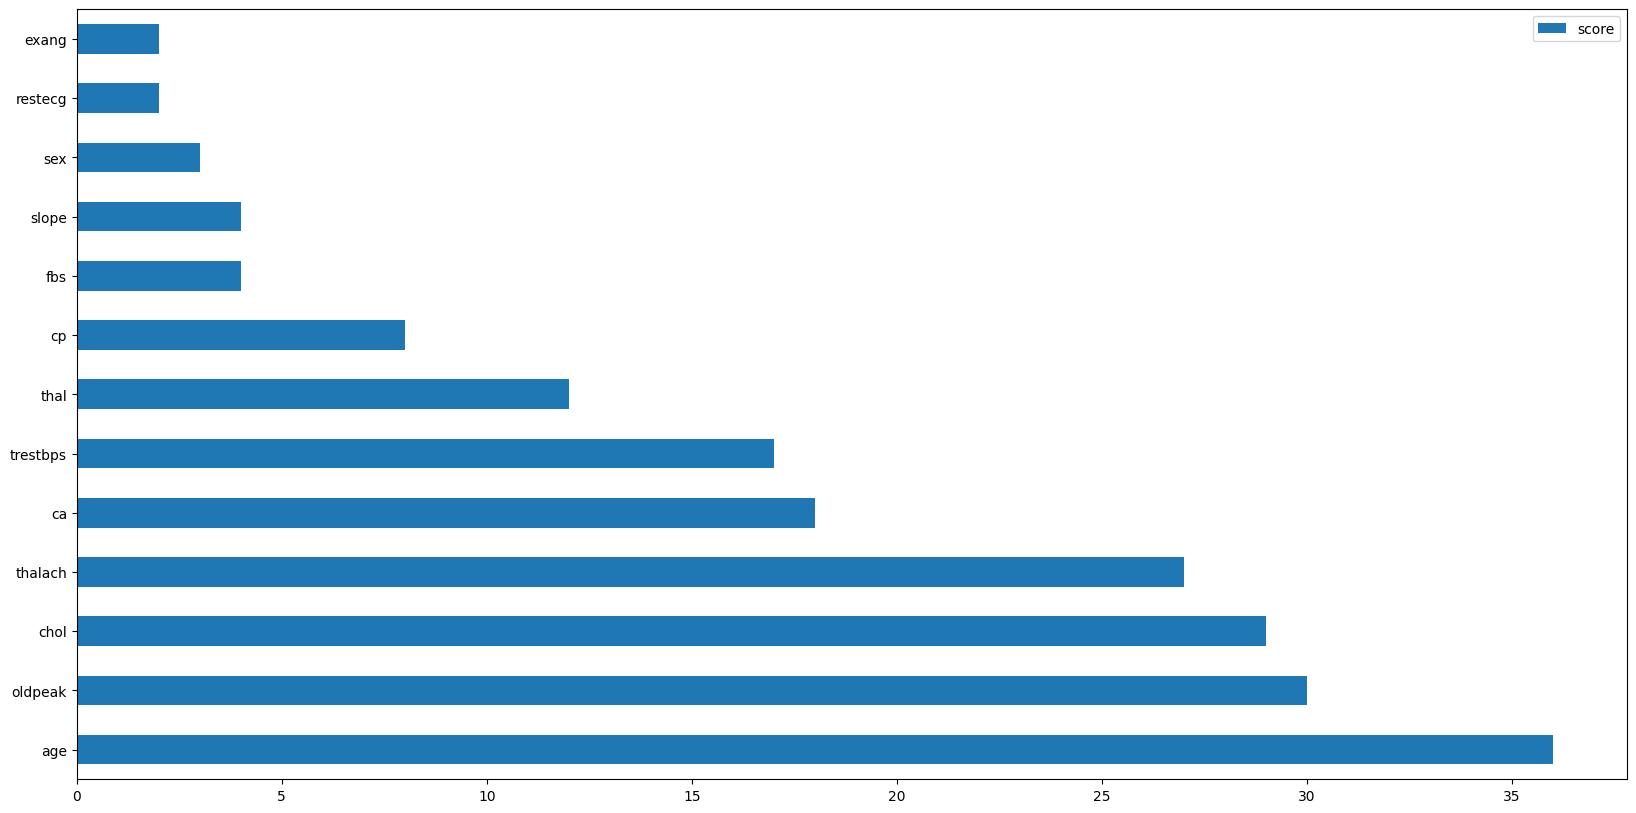

In [21]:
# insert code here
#xgb.plot_importance(xgb_model)
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

feature_important = xgb_hand.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

In [24]:
# insert code here
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
print('The report of the random classifier is: ')
report = classification_report(y_test_heart, xgb_predictions)
print(report)
print('The report of the tuned classifier is:')
report = classification_report(y_test_heart, xgb_predictions_cv)
print(report)

The report of the random classifier is: 
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.00      0.00      0.00        12
           2       0.20      0.22      0.21         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.22      0.25      0.23        61
weighted avg       0.41      0.48      0.44        61

The report of the tuned classifier is:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.22      0.17      0.19        12
           2       0.20      0.11      0.14         9
           3       0.20      0.29      0.24         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.27      0.30      0.28        

c:\Users\agnes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\agnes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\agnes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

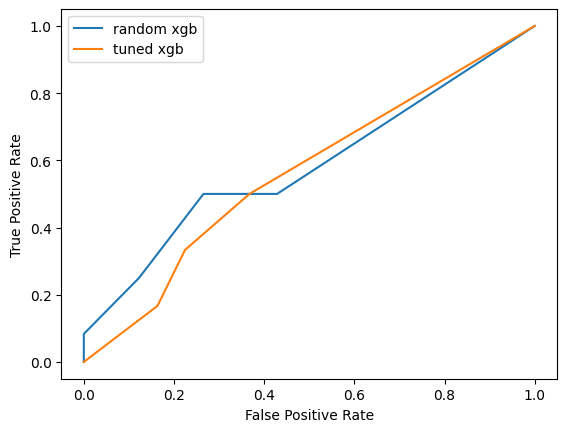

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test_heart, xgb_predictions, pos_label=1)
fpr_cv, tpr_cv, _ = metrics.roc_curve(y_test_heart, xgb_predictions_cv, pos_label=1)
#create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr_cv,tpr_cv)
plt.legend(['random xgb','tuned xgb'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Even with minimum hyperparameter tuning the accuracy grew of 4% (I tried to tune more hyperparameters but it didn't work, I guess maybe it was for cpu's matters). 

About feature importance, knowing the best feature helps us with explainability along with creating a model that could weight more some features.